## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = argmax_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here(5 points)**   

##################################     
TODO: Derive you answer hear

Here all we need is for the score of the ith class larger than others such that the score $w_i^Tx>w_j^Tx$ for all j. Thus the 
update rule is as follows:

For each training point (x, y), if some $y^o$ such that $w_y^Tx <= w_{y^o}^Tx$ (Mistake on point (x, y)) we have:
$$w_y <-- w_y + lr*x$$
$$w_{y^o} <-- w_{y^o} - lr*x$$
where $lr$ is learning rate. The reason this is right is because, before the update:
$$Before:\ s(y) = <w_y^{old},x>$$
$$After:\ s(y) = <w_y^{new}, x> = <w_y^{old}, x> + lr*<x, x>$$
where $<x,x> >= 0$ thus the score of right class will increase so as to achieve the better result.
#################################
                              
                        

In [5]:
from sklearn import datasets
import numpy as np
#Here we change the origin code since the new version of sklearn don't support that code
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [6]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [7]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [8]:
#Test cell:
weight_dimension = [5, 3]
mu = 0     #Zeros mean.
std = 0.1  #small std.
weight = np.random.normal(mu, std, size=(weight_dimension[0], weight_dimension[1]))
print(weight)
print(np.c_[weight, np.ones(5)])

[[ 0.17640523  0.04001572  0.0978738 ]
 [ 0.22408932  0.1867558  -0.09772779]
 [ 0.09500884 -0.01513572 -0.01032189]
 [ 0.04105985  0.01440436  0.14542735]
 [ 0.07610377  0.0121675   0.04438632]]
[[ 0.17640523  0.04001572  0.0978738   1.        ]
 [ 0.22408932  0.1867558  -0.09772779  1.        ]
 [ 0.09500884 -0.01513572 -0.01032189  1.        ]
 [ 0.04105985  0.01440436  0.14542735  1.        ]
 [ 0.07610377  0.0121675   0.04438632  1.        ]]


In [9]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    #In this assignment, the dimension of weight is fixed at 5*3 after absorb the bias, while the number of 
    #the class is 3.
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        mu = 0      #Zeros mean.
        std = 0.01  #small std.
        weight = np.random.normal(mu, std, size=(weight_dimension, num_cls))
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  samll std and zero mean gaussian   ##
        #########################################
        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data-self.sample_mean)/self.sample_std
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = 0.0
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        
        #First transform the input X_train add a new colum with all elements equal to 1.
        X_train = np.c_[X_train, np.ones(X_train.shape[0])]
        
        #Then calculate the predicted y.
        y_predict = np.dot(X_train, self.weight)
        
        #Calculate the accuracy at the same time update the weight by SGD.
        right_answer = 0
        for i in range(X_train.shape[0]):
            #If predict right, accumulate the counter,don't update the weight
            pre_cls = np.argmax(y_predict[i])
            if (pre_cls == y_train[i]):
                right_answer = right_answer + 1
            #If predict wrong, may need to change the weight.
            else:
                if (np.dot(X_train[i, :],self.weight[:, pre_cls]) >= np.dot(X_train[i, :], self.weight[:, y_train[i]])):
                    #Updata the weight using the rules mentioned before.
                    self.weight[:, y_train[i]]   += self.lr*X_train[i, :].T
                    self.weight[:, pre_cls] -= self.lr*X_train[i, :].T
                    
        #Calculate the accuracy:
        train_acc = right_answer/X_train.shape[0]
        
        return train_acc
        
    def test_step(self, X_test, y_test):
        
        
        X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = None
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        
        #First transform the input X_test to absorb mode, which add a column with all elements equal to 1.
        X_test = np.c_[X_test, np.ones(X_test.shape[0])]
        
        #Then calculate the predicted y.
        y_predict = np.dot(X_test, self.weight)
        
        #Finally, calculte the test accuracy.
        right_answer = 0
        for i in range(X_test.shape[0]):
            if (np.argmax(y_predict[i]) == y_test[i]):
                right_answer = right_answer + 1
        test_acc = right_answer/X_test.shape[0]
           
        return test_acc
        
    def train(self):
           
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
         
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

In [10]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches
def main():
    lr = 0.001
    num_epoch = 100
    weight_dimension = 5
    num_cls = 3
    my_pla = MultiClsPLA(X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls)
    my_pla.train()
    my_pla.vis_acc_curve()

epoch: 0 traing_acc:0.143 tst_acc:0.844
epoch: 1 traing_acc:0.771 tst_acc:0.889
epoch: 2 traing_acc:0.933 tst_acc:0.867
epoch: 3 traing_acc:0.810 tst_acc:0.911
epoch: 4 traing_acc:0.924 tst_acc:0.889
epoch: 5 traing_acc:0.876 tst_acc:0.933
epoch: 6 traing_acc:0.943 tst_acc:0.911
epoch: 7 traing_acc:0.876 tst_acc:0.889
epoch: 8 traing_acc:0.933 tst_acc:0.867
epoch: 9 traing_acc:0.810 tst_acc:0.911
epoch: 10 traing_acc:0.933 tst_acc:0.889
epoch: 11 traing_acc:0.790 tst_acc:0.844
epoch: 12 traing_acc:0.876 tst_acc:0.889
epoch: 13 traing_acc:0.895 tst_acc:0.911
epoch: 14 traing_acc:0.933 tst_acc:0.956
epoch: 15 traing_acc:0.943 tst_acc:0.911
epoch: 16 traing_acc:0.943 tst_acc:0.956
epoch: 17 traing_acc:0.952 tst_acc:0.933
epoch: 18 traing_acc:0.943 tst_acc:0.933
epoch: 19 traing_acc:0.943 tst_acc:0.978
epoch: 20 traing_acc:0.962 tst_acc:0.933
epoch: 21 traing_acc:0.943 tst_acc:0.933
epoch: 22 traing_acc:0.943 tst_acc:0.889
epoch: 23 traing_acc:0.914 tst_acc:0.911
epoch: 24 traing_acc:0.943

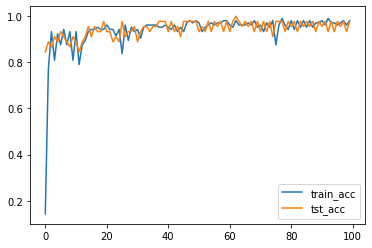

In [11]:
main()